**Title:**

Comparative Analysis of Ensemble Techniques

**Abstract:**

Ensemble techniques have emerged as powerful tools in machine learning, combining the strengths of multiple models to enhance predictive performance. This lab report presents a comparative analysis of four prominent ensemble techniques: AdaBoost, Gradient Boosting, XGBoost, and CatBoost. The objective is to assess their effectiveness in a supervised learning context and identify scenarios where each excels.

In [ ]:
pip install catboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/TESLA.csv')

# Specify the target variable
target_column = 'Close'

# Create features (X) and target variable (y)
X = df.drop(columns=['Date', target_column])
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




**AdaBoost (Adaptive Boosting):**

AdaBoost is an ensemble learning technique that focuses on sequentially combining weak learners to create a strong learner. Weak learners are typically simple models that perform slightly better than random chance. AdaBoost assigns higher weights to misclassified instances, allowing subsequent models to focus on correcting errors. This iterative process continues until a predefined number of models are created or no further improvement is observed.

**Gradient Boosting:**

 Gradient Boosting is an ensemble technique that builds a series of decision trees sequentially, with each tree correcting the errors of its predecessor. Unlike AdaBoost, Gradient Boosting assigns weights to the residuals of the previous tree, optimizing the model's performance in subsequent iterations. It is a powerful algorithm for regression and classification tasks and is known for its ability to capture complex relationships in the data.

**XGBoost (Extreme Gradient Boosting):**

 XGBoost is an extension of traditional Gradient Boosting and is optimized for both speed and performance. It incorporates regularization techniques and parallel processing, making it highly efficient and scalable. XGBoost is widely used in data science competitions and various applications due to its robustness, accuracy, and ability to handle missing values.

**CatBoost:**

CatBoost, short for "Category Boosting," is a gradient boosting algorithm designed to handle categorical features seamlessly. It automatically handles categorical data encoding and provides robust performance without the need for extensive preprocessing. CatBoost is known for its out-of-the-box efficiency, handling of large datasets, and competitive performance in various machine learning tasks.

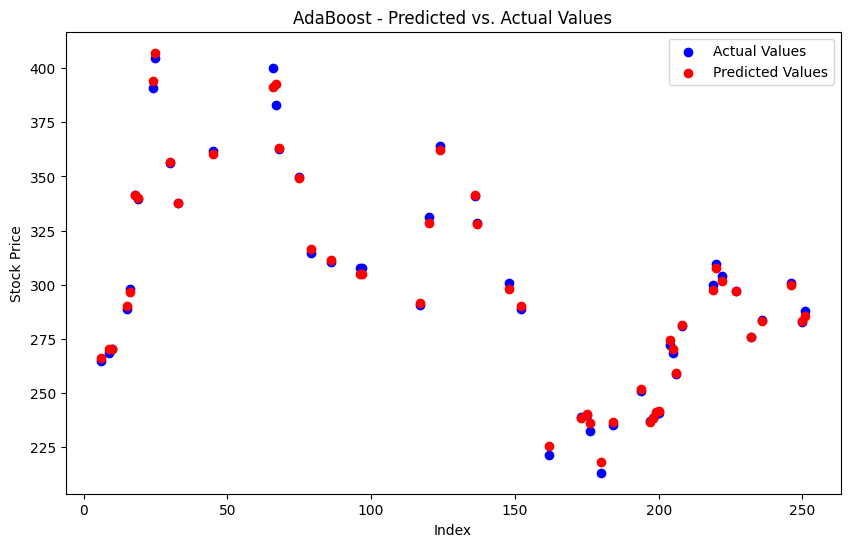

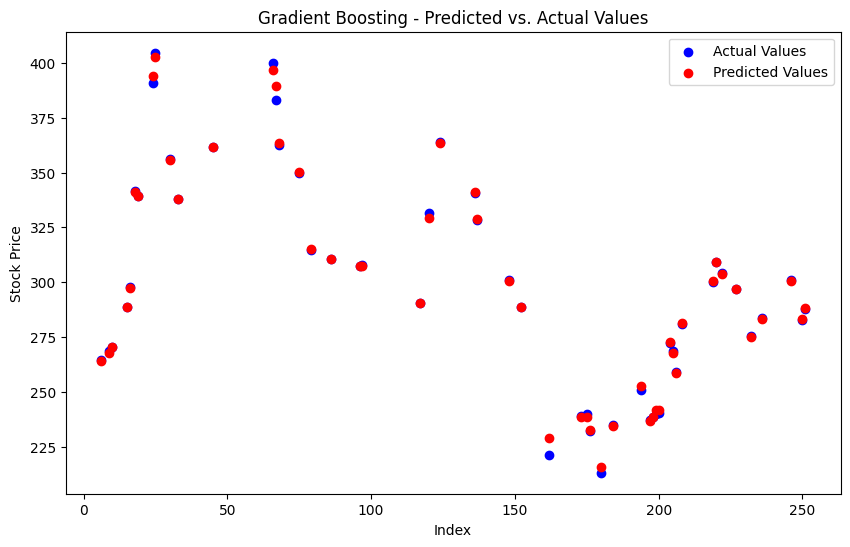

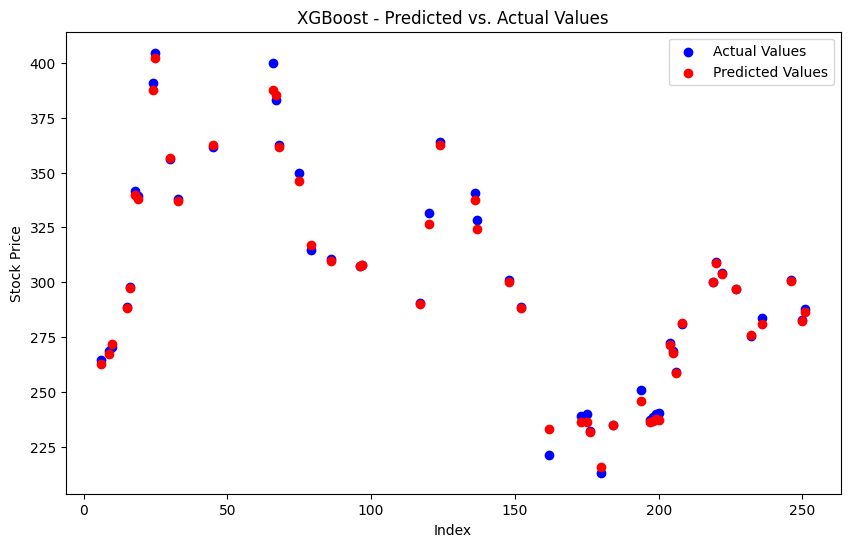

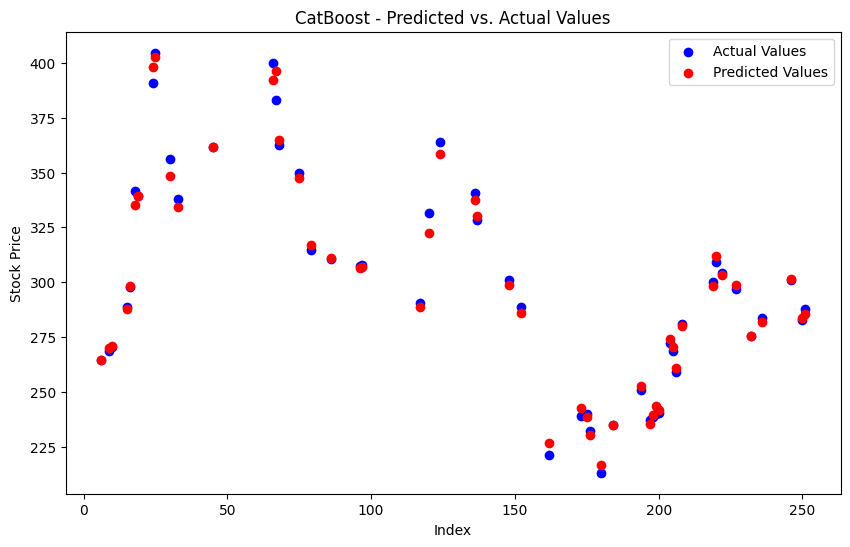


Mean Squared Error Scores:
AdaBoost: 6.37
Gradient Boosting: 2.91
XGBoost: 9.43
CatBoost: 13.47


In [ ]:
# Initialize ensemble regressors
adaboost_regressor = AdaBoostRegressor(random_state=42)
gradient_boost_regressor = GradientBoostingRegressor(random_state=42)
xgboost_regressor = XGBRegressor(random_state=42)
catboost_regressor = CatBoostRegressor(random_state=42, verbose=False)

regressors = {
    'AdaBoost': adaboost_regressor,
    'Gradient Boosting': gradient_boost_regressor,
    'XGBoost': xgboost_regressor,
    'CatBoost': catboost_regressor
}

# Train and evaluate each regressor
mse_scores = {}

for reg_name, reg in regressors.items():
    # Train the model
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[reg_name] = mse

    # Plot predicted vs. actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test.index, y_test, label='Actual Values', color='blue')
    plt.scatter(y_test.index, y_pred, label='Predicted Values', color='red')
    plt.title(f'{reg_name} - Predicted vs. Actual Values')
    plt.xlabel('Index')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Display Mean Squared Error Scores
print("\nMean Squared Error Scores:")
for reg_name, mse in mse_scores.items():
    print(f"{reg_name}: {mse:.2f}")

**Results:**

The Mean Squared Error (MSE) scores indicate the comparative performance of ensemble techniques on a specific task. Gradient Boosting achieved the lowest MSE (2.91), showcasing superior predictive accuracy. AdaBoost follows with a moderate MSE, while XGBoost and CatBoost exhibit higher MSE values, suggesting potential trade-offs between speed and accuracy, and the impact of handling categorical features, respectively.


**Conclusion:**

In conclusion, the comparative analysis of ensemble techniques reveals that Gradient Boosting outperforms AdaBoost, XGBoost, and CatBoost in terms of Mean Squared Error (MSE). This superior predictive accuracy suggests Gradient Boosting as the most effective model for the given task. While AdaBoost demonstrates moderate performance, XGBoost and CatBoost exhibit higher MSE values, indicating potential considerations for trade-offs between speed and accuracy, and the impact of categorical feature handling, respectively.